In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tlsa = yf.download("TSLA",start = "2022-02-01")
tlsa

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,311.736664,314.566681,301.666656,310.416656,310.416656,73138200
2022-02-02,309.393341,310.500000,296.470001,301.886658,301.886658,66792900
2022-02-03,294.000000,312.333344,293.506653,297.046661,297.046661,78855600
2022-02-04,299.073334,312.166656,293.723328,307.773346,307.773346,73625400
2022-02-07,307.929993,315.923340,300.903320,302.446655,302.446655,60994500
...,...,...,...,...,...,...
2023-02-03,183.949997,199.000000,183.690002,189.979996,189.979996,231684200
2023-02-06,193.009995,198.169998,189.919998,194.759995,194.759995,186188100
2023-02-07,196.429993,197.500000,189.550003,196.809998,196.809998,186010300


<AxesSubplot:xlabel='Date'>

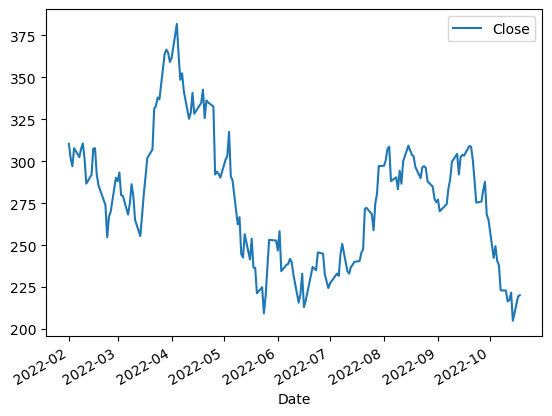

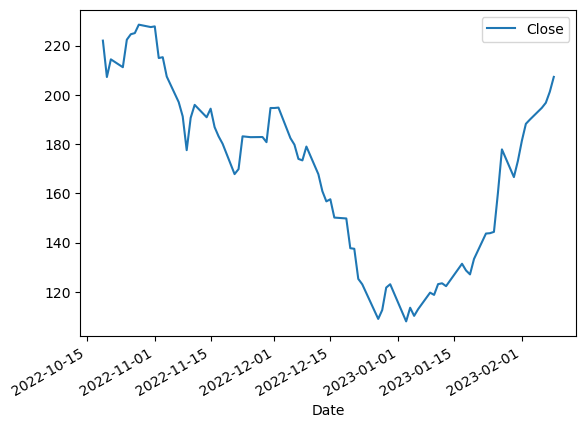

In [2]:
tsla_train_df = tlsa[['Close']][:int(0.7*len(tlsa))]
tsla_test_df = tlsa[['Close']][int(0.7*len(tlsa)):]
tsla_train_df.plot()
tsla_test_df.plot()

In [55]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings(action='ignore')

# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(tsla_train_df.Close.values, order = (2,1,2))
model_fit = model.fit()

In [56]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  180
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -669.718
Date:                Fri, 10 Feb 2023   AIC                           1349.437
Time:                        11:20:15   BIC                           1365.374
Sample:                             0   HQIC                          1355.899
                                - 180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5763      0.059    -26.784      0.000      -1.692      -1.461
ar.L2         -0.8031      0.056    -14.410      0.000      -0.912      -0.694
ma.L1          1.6682      0.566      2.947      0.0

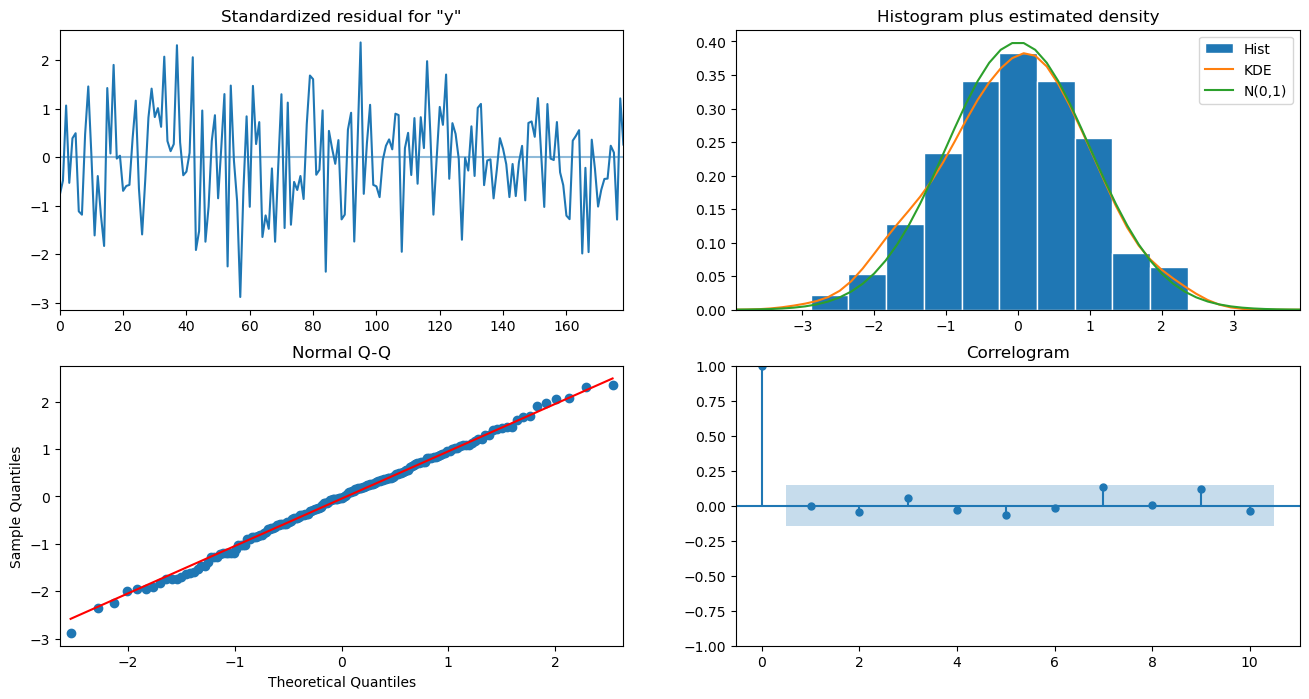

In [85]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

In [94]:
forecast_data = model_fit.forecast(steps=78) ## 5일 동안의 미래

In [95]:
pred_y = forecast_data
test_y = tsla_test_df.Close.values

In [96]:
pd.DataFrame({"test": test_y, "pred": pred_y})

,test,pred
0,222.039993,223.756282
1,207.279999,220.047722
2,214.440002,223.029641
3,211.250000,221.307419
4,222.419998,221.627487
...,...,...
73,189.979996,221.811528
74,194.759995,221.811578
75,196.809998,221.811011
76,201.289993,221.811865
